In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Generating the dataset as per the provided command
N = 1000
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

X.shape, X[:10]  # Checking the shape and the first few elements of X

((1000, 1),
 array([[ 1.62434536],
        [-0.61175641],
        [-0.52817175],
        [-1.07296862],
        [ 0.86540763],
        [-2.3015387 ],
        [ 1.74481176],
        [-0.7612069 ],
        [ 0.3190391 ],
        [-0.24937038]]))

In [3]:
# Setting style for the plot
plt.style.use('ggplot')

# Grid search for optimal bandwidth
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=20)  # 20-fold cross-validation
grid.fit(X)
print("best bandwidth: ", grid.best_params_)

best bandwidth:  {'bandwidth': 0.3793103448275862}


In [4]:
# Using the best bandwidth found by grid search
kde_optimal = KernelDensity(kernel='gaussian', bandwidth=grid.best_params_['bandwidth'])
kde_optimal.fit(X)

# Calculating the log density and converting it to actual density with optimal bandwidth
log_density_optimal = kde_optimal.score_samples(X)
density_optimal = np.exp(log_density_optimal)

<ipython-input-5-2b216248e19e>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "|k" (-> color='k'). The keyword argument will take precedence.
  plt.plot(X, np.full_like(X, -0.01), '|k', markeredgewidth=1, color='orange')


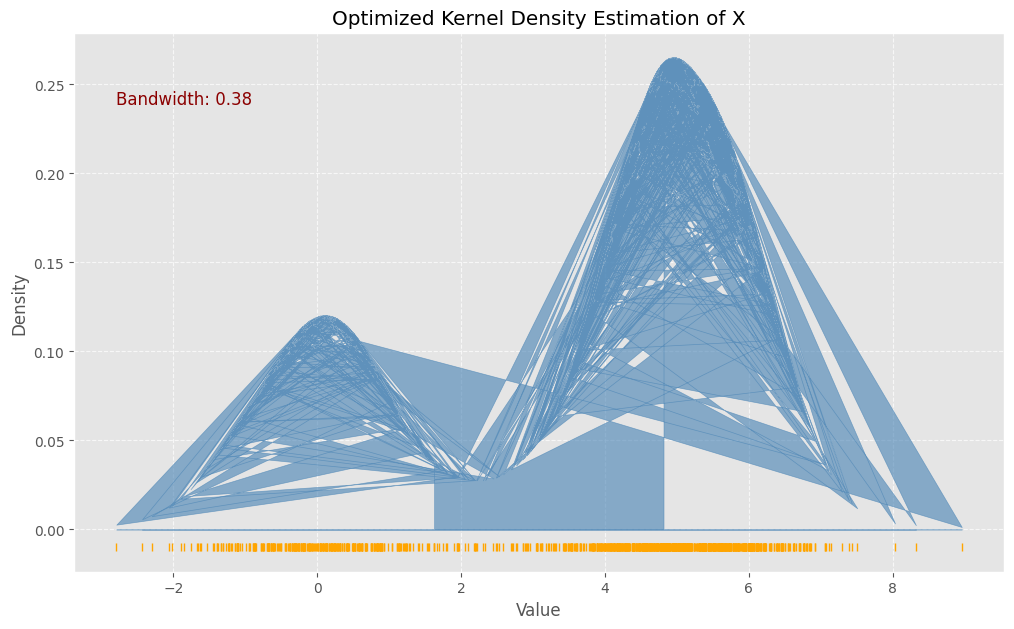

In [5]:
#Plotting
plt.figure(figsize=(12, 7))
plt.fill_between(X[:, 0], density_optimal, alpha=0.6, color='steelblue')
plt.plot(X, np.full_like(X, -0.01), '|k', markeredgewidth=1, color='orange')
plt.title('Optimized Kernel Density Estimation of X')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.7)
plt.text(min(X), max(density_optimal)*0.9, f'Bandwidth: {grid.best_params_["bandwidth"]:.2f}',
         fontsize=12, color='darkred')
plt.show()


In [6]:
# Function to perform KDE with a specified bandwidth and return the density
def perform_kde(X, bandwidth, x_d):
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
    kde.fit(X)
    log_density = kde.score_samples(x_d)
    return np.exp(log_density)

In [7]:
# Bandwidths to investigate
bandwidths = [10, 1, 0.1]

# Preparing the range for density estimation
x_d_range = np.linspace(min(X)[0] - 1, max(X)[0] + 1, 1000)[:, np.newaxis]

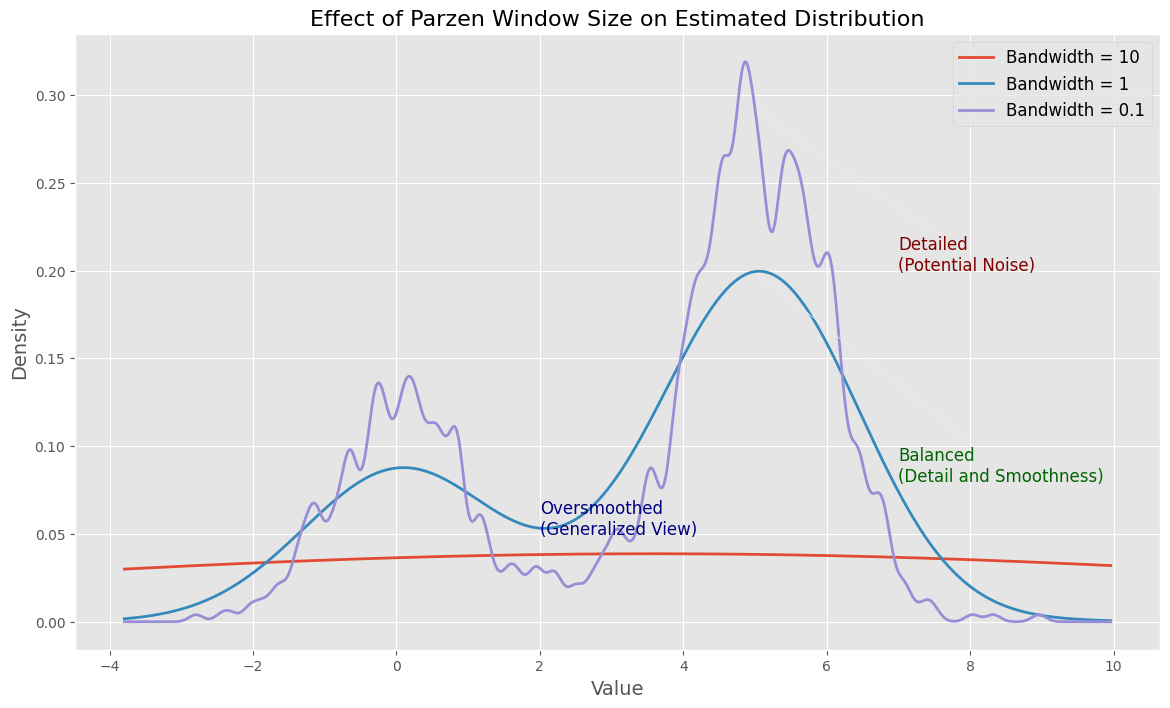

In [10]:
# Redrawing the plot with correctly positioned arrows for each bandwidth

plt.figure(figsize=(14, 8))
for bandwidth in bandwidths:
    density = perform_kde(X, bandwidth, x_d_range)
    plt.plot(x_d_range[:, 0], density, lw=2, label=f'Bandwidth = {bandwidth}')

# Adjusting annotations and arrow positions for each bandwidth
# Annotation for Bandwidth = 10
plt.annotate('Oversmoothed\n(Generalized View)', xy=(3, perform_kde(X, 10, [[3]])[0]),
             xytext=(2, 0.05), arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=12, color='navy')

# Annotation for Bandwidth = 1
plt.annotate('Balanced\n(Detail and Smoothness)', xy=(5, perform_kde(X, 1, [[5]])[0]),
             xytext=(7, 0.08), arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=12, color='darkgreen')

# Annotation for Bandwidth = 0.1
plt.annotate('Detailed\n(Potential Noise)', xy=(5, perform_kde(X, 0.1, [[5]])[0]),
             xytext=(7, 0.2), arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=12, color='maroon')

# Plot enhancements
plt.title('Effect of Parzen Window Size on Estimated Distribution', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)
plt.show()
